In [ ]:
#Code from Daniel Olds to explore with to make more datasets through pyFAI

In [2]:
#including imports 
import pyFAI
import numpy as np
import matplotlib.pyplot as plt
import fabio
import pandas as pd
from SimDAT2D import SimDAT2D

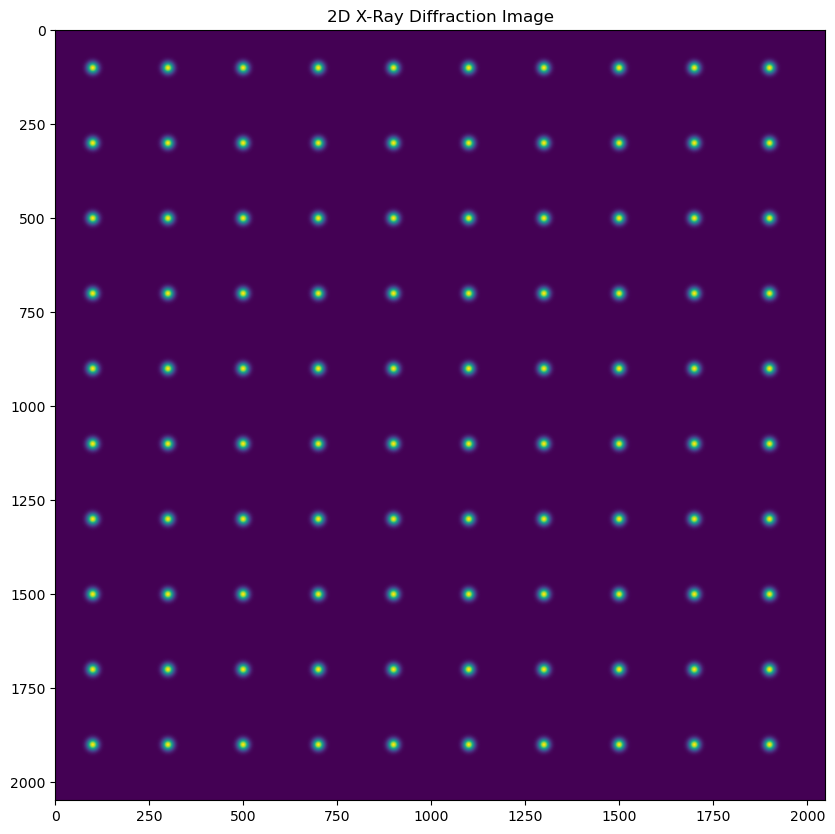

array([[3.72007598e-44, 1.00617800e-43, 2.69435542e-43, ...,
        5.20681163e-29, 8.97971098e-29, 1.53323917e-28],
       [1.00617800e-43, 2.72143414e-43, 7.28748868e-43, ...,
        1.40829902e-28, 2.42876429e-28, 4.14698931e-28],
       [2.69435542e-43, 7.28748868e-43, 1.95145238e-42, ...,
        3.77115984e-28, 6.50377387e-28, 1.11048573e-27],
       ...,
       [5.20681163e-29, 1.40829902e-28, 3.77115984e-28, ...,
        7.28772410e-14, 1.25684701e-13, 2.14600121e-13],
       [8.97971098e-29, 2.42876429e-28, 6.50377387e-28, ...,
        1.25684701e-13, 2.16756888e-13, 3.70101168e-13],
       [1.53323917e-28, 4.14698931e-28, 1.11048573e-27, ...,
        2.14600121e-13, 3.70101168e-13, 6.31928589e-13]])

In [24]:
SimDAT2D.create_anisotropic(15, 10, 200, size = 200)

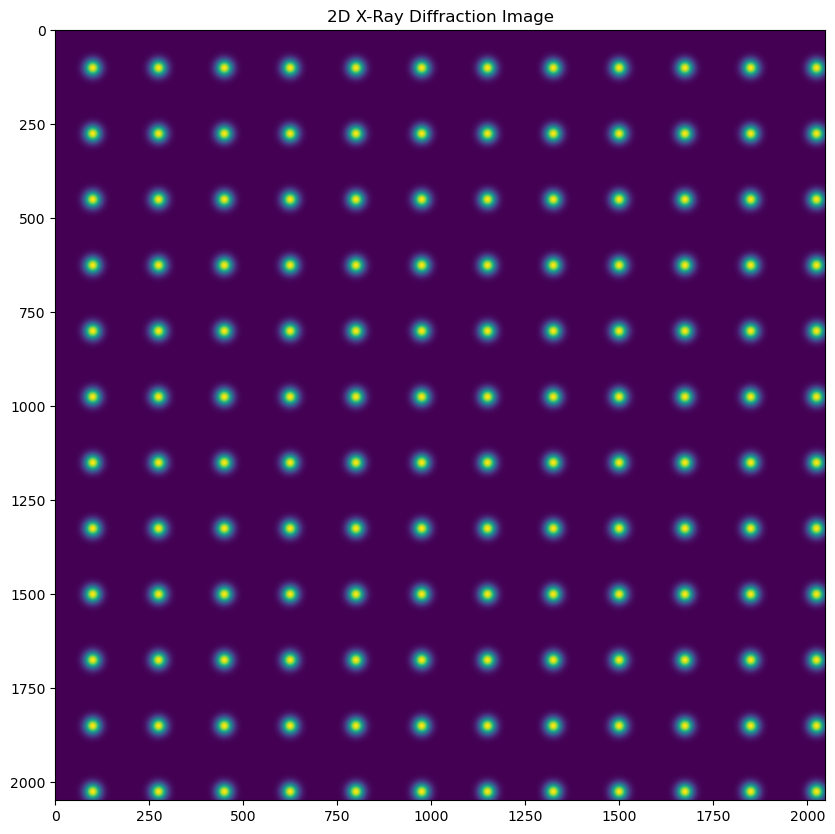

Select calibrant:
1. AgBh
2. Al
3. alpha_Al2O3
4. Au
5. C14H30O
6. CeO2
7. Cr2O3
8. cristobaltite
9. CrOx
10. CuO
11. hydrocerussite
12. LaB6
13. LaB6_SRM660a
14. LaB6_SRM660b
15. LaB6_SRM660c
16. mock
17. NaCl
18. Ni
19. PBBA
20. Pt
21. quartz
22. Si
23. Si_SRM640
24. Si_SRM640a
25. Si_SRM640b
26. Si_SRM640c
27. Si_SRM640d
28. Si_SRM640e
29. TiO2
30. ZnO
alpha_Al2O3


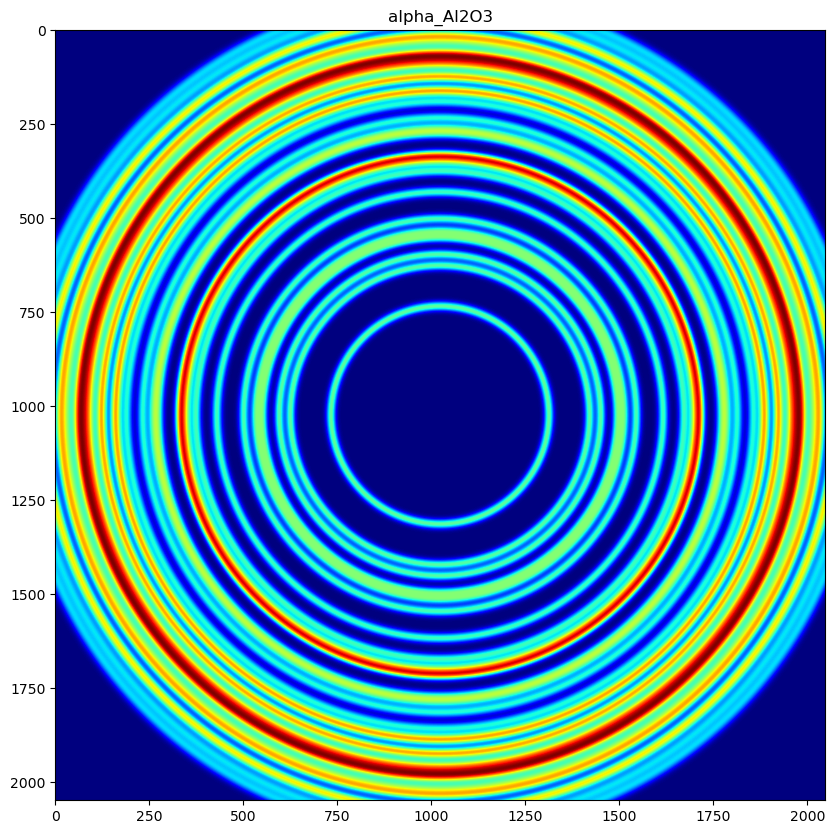

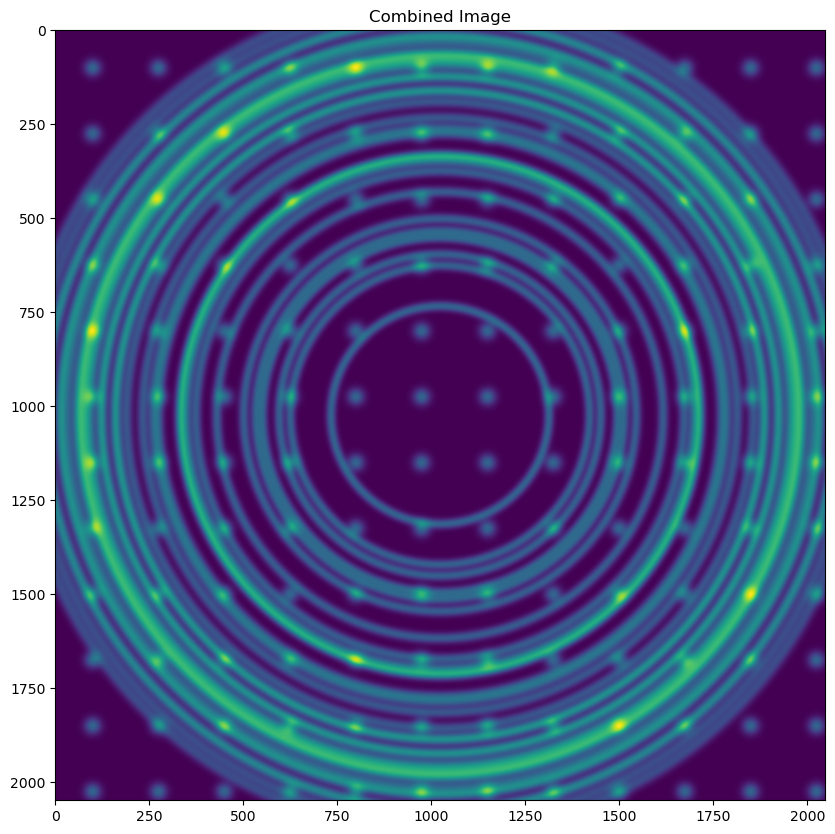

In [29]:
my_tiff = SimDAT2D.combine_image(SimDAT2D.create_anisotropic(25, 15, 175, size = 200), SimDAT2D.create_isotropic(.4, .5e-10, cmap = 'jet'))

In [30]:
dete = pyFAI.detectors.Perkin()
p1, p2, p3 = dete.calc_cartesian_positions()
poni1 = p1.mean()
poni2 = p2.mean()

  File "C:\Users\dalverson\AppData\Local\Temp\ipykernel_20216\472995183.py", line 1, in <module>
    ai_pe = pyFAI.AzimuthalIntegrator(dist=0.2, wavelength = .5e-10, poni1=poni1, poni2=poni2, detector=dete)


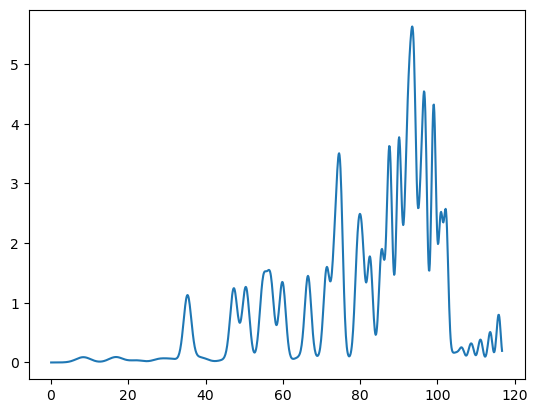

In [33]:
ai_pe = pyFAI.AzimuthalIntegrator(dist=0.2, wavelength = .5e-10, poni1=poni1, poni2=poni2, detector=dete)


#plot the integrated data
plt.plot(ai_pe.integrate1d(my_tiff, 1000, unit='q_nm^-1')[0], ai_pe.integrate1d(my_tiff, 1000, unit='q_nm^-1')[1])


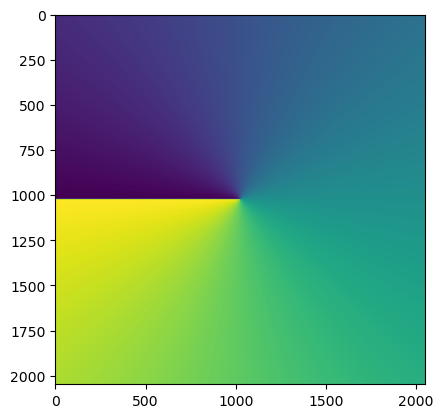

In [40]:
ai_pe.array_from_unit(unit='q_A^-1')

chi_array = ai_pe.chiArray()

plt.figure()
plt.imshow(chi_array)

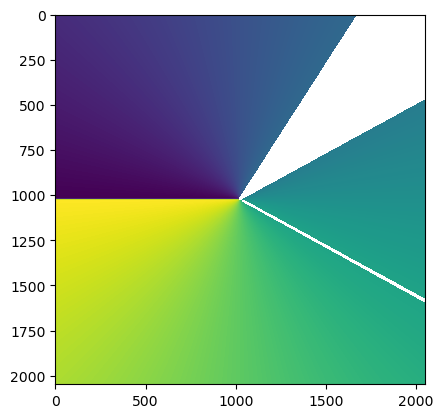

In [117]:
import numpy.ma as ma
first_mask = ma.masked_inside(chi_array, 0.5, 0.505)
#I want to add multiple masks to the same array

second_mask = ma.masked_inside(chi_array, -1, -0.5)

masks = [first_mask, second_mask]

#combine the masks by adding them together

combined_masks = first_mask + second_mask

plt.figure()
plt.imshow(combined_masks)

<built-in method min of numpy.ndarray object at 0x000001C0F43C0BD0>


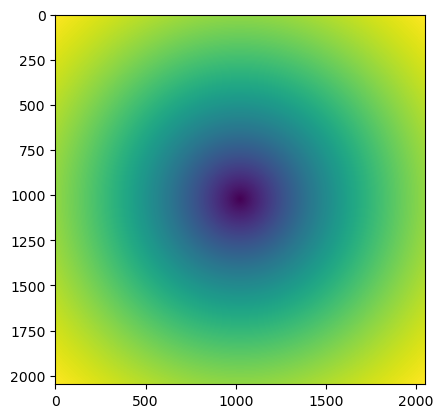

In [128]:
plt.figure()
plt.imshow(ai_pe.array_from_unit(unit = 'q_A^-1'))

print(ai_pe.array_from_unit(unit = 'q_A^-1').min)

q_array = ai_pe.array_from_unit(unit = 'q_A^-1')

In [227]:
#I want to create a function that makes hundreds of masks that have the same width but the amount of masks per combined mask
#is randomized and the location of where those mask lie are also random.

def generate_mask(array, width, num_masks, offset = .01):
    mask_list = []
    
    # Create masks for the positive values
    for i in range(num_masks):
        start = i * (width + offset)
        end = start + width
        mask_list.append(ma.masked_inside(array, start, end))

    # Create masks for the negative values
    for i in range(num_masks):
        start = - (i + 1) * (width + offset)
        end = start - width
        mask_list.append(ma.masked_inside(array, start, end))
    
    #add all genrated masks together
    
    print(mask_list)

    combined_mask = mask_list[0]
    for mask in mask_list[1:]:
        combined_mask += mask
        
    inverted_mask = ~combined_mask.mask 
    plt.figure()
    plt.imshow(~combined_mask.mask)
    
    return inverted_mask

[masked_array(
  data=[[-2.356197474784135, -2.355708710786514, -2.355219505474359, ...,
         -0.7863789101784578, -0.7858896628062677, -0.7854008932226118],
        [-2.3566862416978602, -2.3561974777030925, -2.355708271926114,
         ..., -0.7858901437349658, -0.7854008958924206,
         -0.7849121263061548],
        [-2.357175449925894, -2.3566866864016647, -2.3561974806275474,
         ..., -0.7854009350362892, -0.7849116871911093,
         -0.784422918069919],
        ...,
        [2.3571752311133767, 2.3566864675888324, 2.356197261814609, ...,
         0.7854011538492275, 0.7849119060039441, 0.7844231368824413],
        [2.3566859866658816, 2.3561972226709904, 2.3557080168941322, ...,
         0.7858903987669444, 0.7854011509245228, 0.7849123813381366],
        [2.3561972200012136, 2.355708456003713, 2.3552192506919223, ...,
         0.786379164960889, 0.785889917589066, 0.7854011480055332]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, F

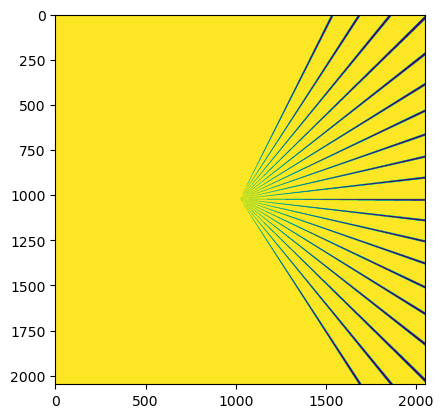

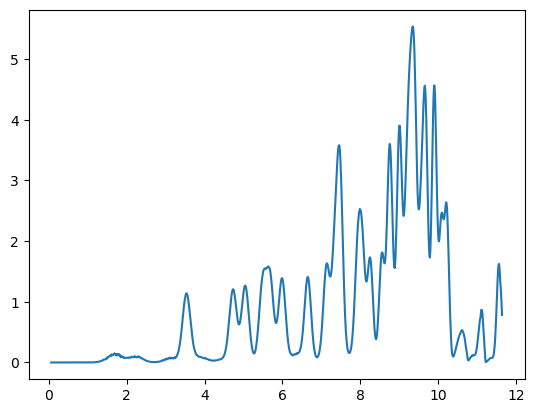

In [155]:
weird_masking_integration = ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = generate_mask(chi_array, .01, 10, offset = .1))

plt.figure()

plt.plot(weird_masking_integration[0], weird_masking_integration[1])

[masked_array(
  data=[[11.675101409952187, 11.672558729251067, 11.670015649082146, ...,
         11.669985706932993, 11.672528983481444, 11.67507167108837],
        [11.672558744445357, 11.670012984730763, 11.667466822600122, ...,
         11.667436844149359, 11.669983202926458, 11.672528969584034],
        [11.670015679506365, 11.667466837830107, 11.664917590781661, ...,
         11.664887575994438, 11.667437019956584, 11.669985868613097],
        ...,
        [11.670016816541587, 11.667467976243863, 11.664918730575272, ...,
         11.664888715804302, 11.667438158386474, 11.669987005664435],
        [11.672560070680051, 11.670014312572087, 11.66746815204962, ...,
         11.6674381736178, 11.669984530786586, 11.672530295837511],
        [11.67510273587899, 11.672560056782844, 11.670016978220435, ...,
         11.669987036090204, 11.672530311032006, 11.675072997033938]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]

masked_array(
  data=[[233.5020281990438, 233.45117458502145, 233.4003129816428, ...,
         233.39971413865996, 233.45057966962887, 233.50143342176747],
        [233.4511748889071, 233.40025969461524, 233.3493364520024, ...,
         233.34873688298725, 233.39966405852917, 233.45057939168058],
        [233.4003135901274, 233.34933675660224, 233.29835181563328, ...,
         233.2977515198888, 233.34874039913174, 233.39971737226182],
        ...,
        [233.40033633083178, 233.34935952487734, 233.29837461150535, ...,
         233.29777431608596, 233.34876316772937, 233.39974011328874],
        [233.451201413601, 233.40028625144168, 233.34936304099242, ...,
         233.34876347235596, 233.3996906157318, 233.45060591675013],
        [233.50205471757985, 233.451201135657, 233.40033956440877, ...,
         233.39974072180397, 233.4506062206401, 233.50145994067876]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
      

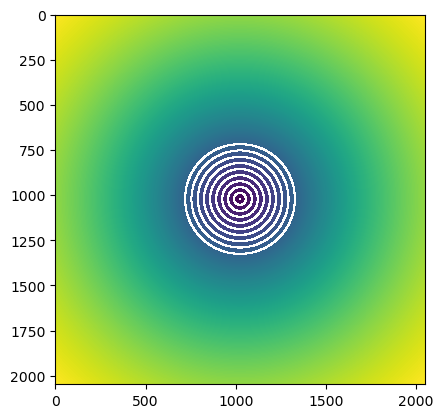

In [131]:
generate_mask(q_array, .01, 10, offset = .4)

[masked_array(
  data=[[-2.356197474784135, -2.355708710786514, -2.355219505474359, ...,
         -0.7863789101784578, -0.7858896628062677, -0.7854008932226118],
        [-2.3566862416978602, -2.3561974777030925, -2.355708271926114,
         ..., -0.7858901437349658, -0.7854008958924206,
         -0.7849121263061548],
        [-2.357175449925894, -2.3566866864016647, -2.3561974806275474,
         ..., -0.7854009350362892, -0.7849116871911093,
         -0.784422918069919],
        ...,
        [2.3571752311133767, 2.3566864675888324, 2.356197261814609, ...,
         0.7854011538492275, 0.7849119060039441, 0.7844231368824413],
        [2.3566859866658816, 2.3561972226709904, 2.3557080168941322, ...,
         0.7858903987669444, 0.7854011509245228, 0.7849123813381366],
        [2.3561972200012136, 2.355708456003713, 2.3552192506919223, ...,
         0.786379164960889, 0.785889917589066, 0.7854011480055332]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, F

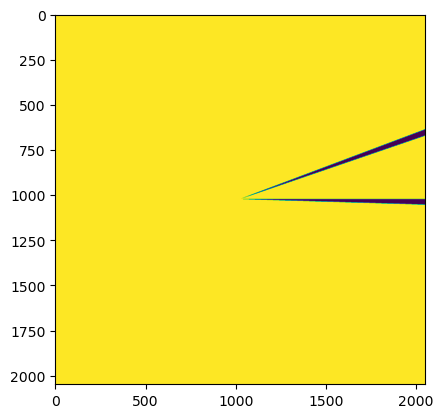

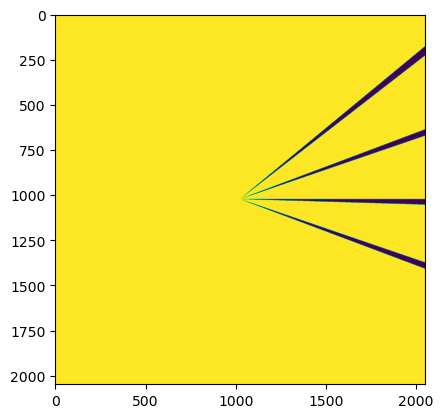

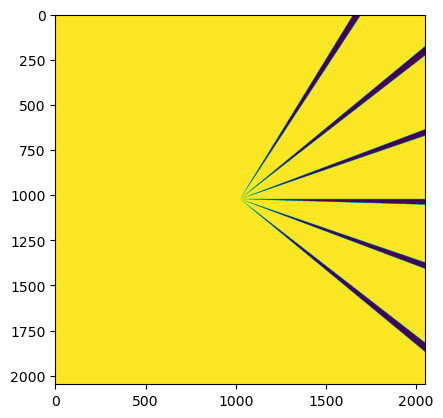

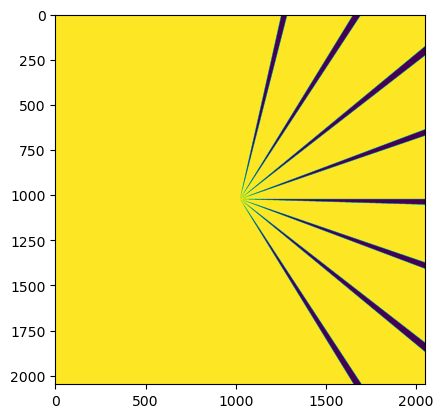

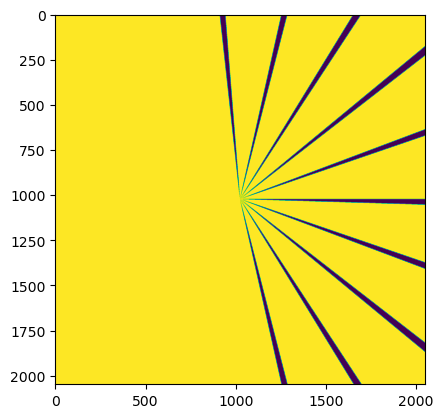

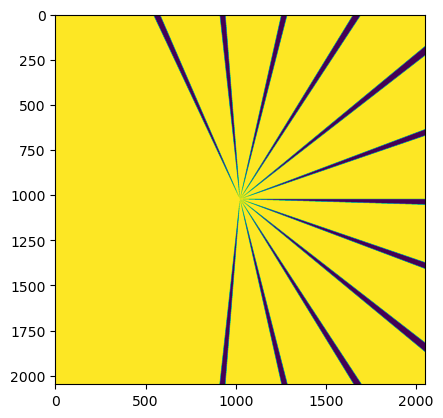

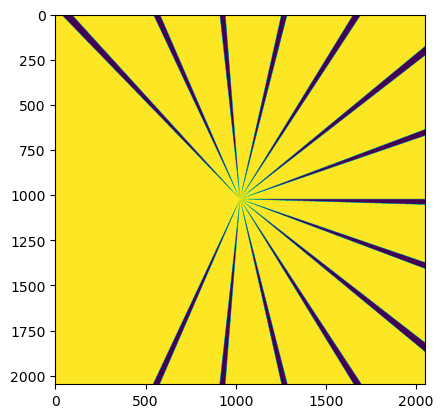

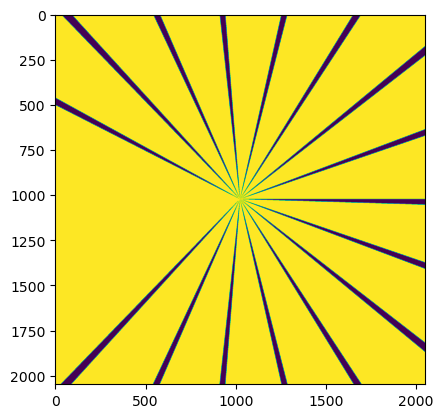

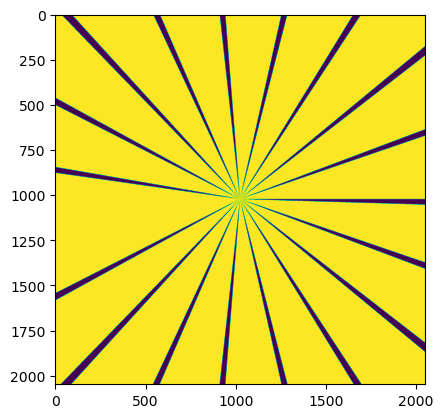

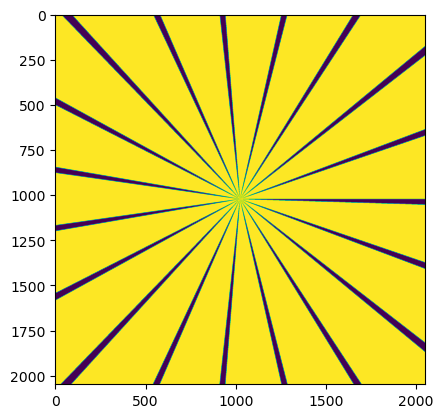

In [229]:
mask_list = []

for i in range(10):
    mask = generate_mask(chi_array, .03, i+1, offset = .3)
    mask_list.append(mask)

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def make_colormap(length, use_cmap='plasma'):
    cmap = plt.get_cmap(use_cmap)
    colors = cmap(np.linspace(0, 1, length))
    return colors.tolist()

In [176]:
cc = make_colormap(10)
cc

[[0.050383, 0.029803, 0.527975, 1.0],
 [0.274191, 0.012109, 0.622722, 1.0],
 [0.447714, 0.00208, 0.66024, 1.0],
 [0.610667, 0.090204, 0.619951, 1.0],
 [0.740143, 0.213864, 0.524216, 1.0],
 [0.846788, 0.342551, 0.420579, 1.0],
 [0.928329, 0.472975, 0.326067, 1.0],
 [0.983041, 0.624131, 0.227937, 1.0],
 [0.991209, 0.790537, 0.149377, 1.0],
 [0.940015, 0.975158, 0.131326, 1.0]]

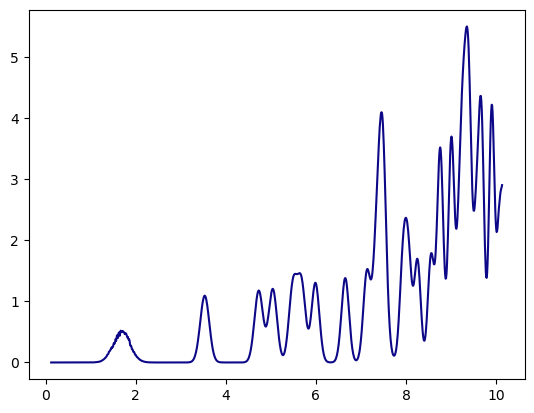

In [178]:
plt.figure()

plt.plot(ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = mask_list[0])[0], ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = mask_list[0])[1], color = cc[0])

In [170]:
q = ai_pe.array_from_unit(unit = 'q_A^-1')

In [230]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

I_list = np.arange(0, 10, 1)
cc = make_colormap(len(I_list)+10,use_cmap='plasma')

def f(i):
    phi_list = np.arange(0, np.pi,.05)
    plt.subplot(121)
    plt.cla()

    plt.plot(ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = mask_list[I_list[i]])[0], ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = mask_list[I_list[i]])[1], color = cc[i])
    #plt.plot(q, I_list[i],c=cc[i],label=round(phi_list[i],3))
    #plt.legend(loc=0)

    plt.subplot(122)
    plt.cla()

    plt.imshow(mask_list[i]+my_tiff)
    
    plt.show()

plt.figure()

interact(f, i=widgets.IntSlider(min=0, max=len(I_list)-1, step=1, value=10));

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=9, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

In [220]:
from scipy.ndimage import rotate as scipy_rotate

def rotate_generated_mask(mask, deg, offset = 1, plot = False):
    rotated_masks = []
    deg_list = np.arange(0, deg, offset)  # Adjust the range as needed
    for i in deg_list:
        rotated_mask = ma.masked_invalid(scipy_rotate(mask, angle=i, reshape=False, order=0))
        rotated_masks.append(rotated_mask)
        if plot == True:  
         plt.figure()
        
         plt.imshow(rotated_mask)
    return rotated_masks

[masked_array(
   data=[[True, True, True, ..., True, True, True],
         [True, True, True, ..., True, True, True],
         [True, True, True, ..., True, True, True],
         ...,
         [True, True, True, ..., True, True, True],
         [True, True, True, ..., True, True, True],
         [True, True, True, ..., True, True, True]],
   mask=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
   fill_value=True),
 masked_array(
   data=[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [Fal

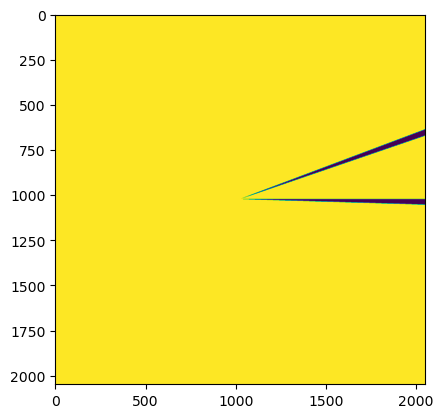

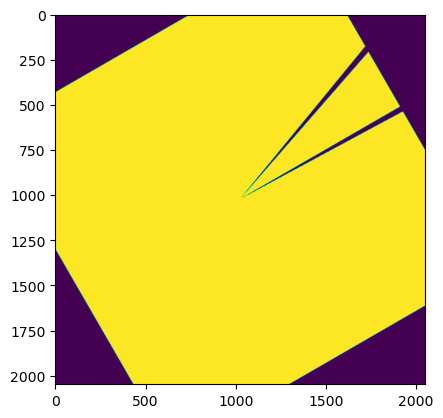

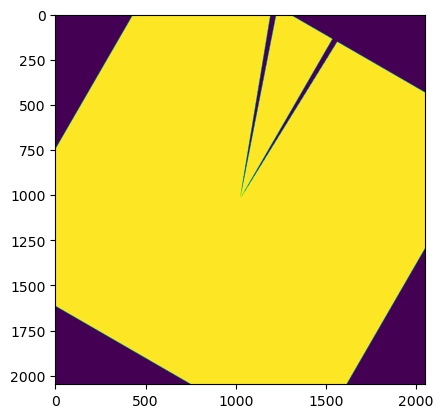

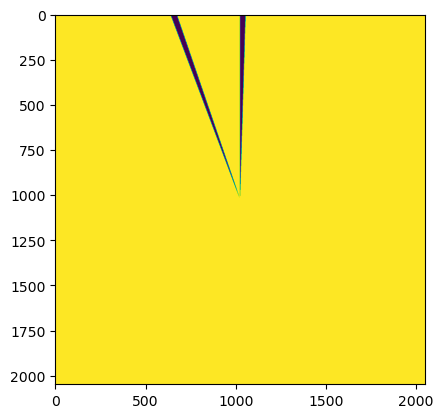

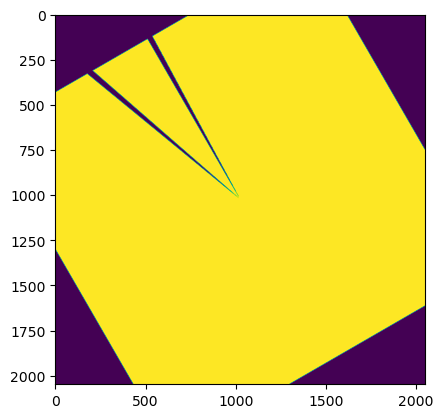

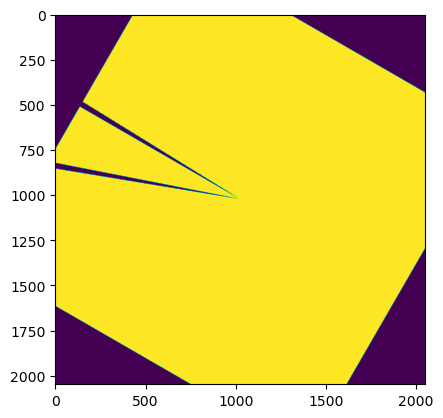

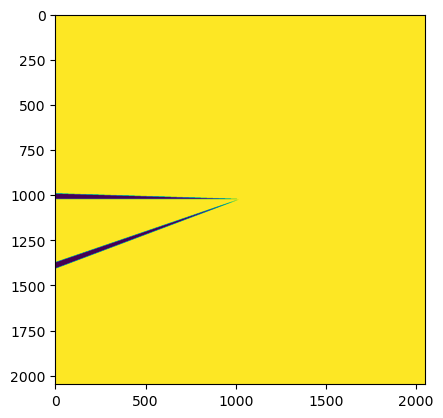

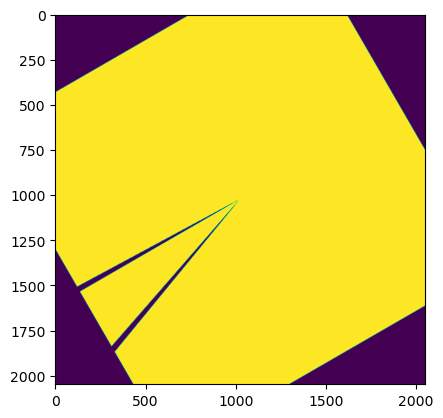

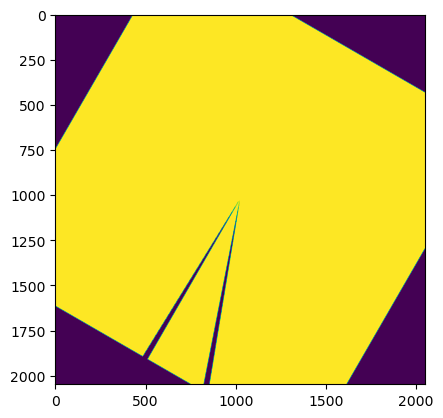

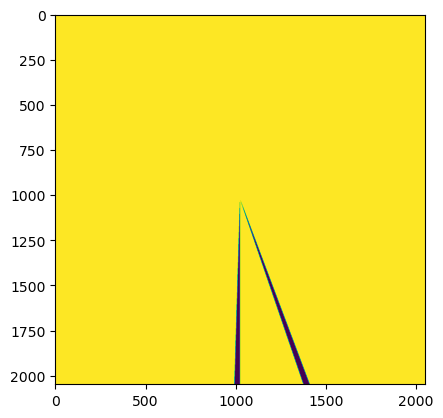

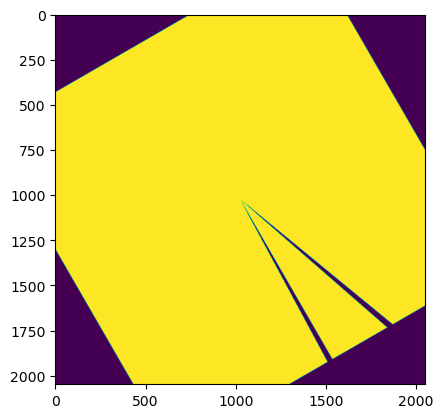

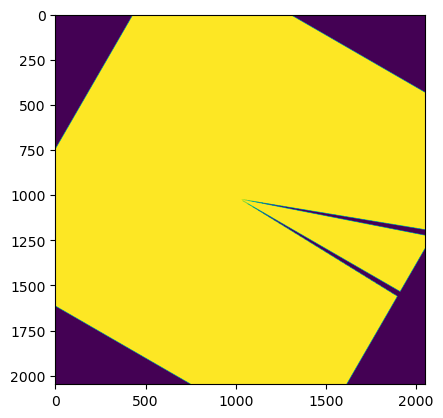

In [221]:
rotate_generated_mask(mask_list[0], 360, offset = 30, plot = True)

In [213]:
new_mask_list = []
for i in range(10):
    a = rotate_generated_mask(mask_list[i], 360, offset = 1, plot = False)
    new_mask_list.append(a)

In [214]:
import itertools
merged = list(itertools.chain(*new_mask_list))

In [215]:
len(merged)

3600

In [217]:
I_list = np.arange(0, 3600, 1)
cc = make_colormap(len(I_list)+10,use_cmap='plasma')

def f(i):
    phi_list = np.arange(0, np.pi,.05)
    plt.subplot(121)
    plt.cla()

    plt.plot(ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = merged[I_list[i]])[0], ai_pe.integrate1d(my_tiff, 1000, unit = 'q_A^-1', mask = merged[I_list[i]])[1], color = cc[i])
    #plt.plot(q, I_list[i],c=cc[i],label=round(phi_list[i],3))
    #plt.legend(loc=0)

    plt.subplot(122)
    plt.cla()

    plt.imshow(merged[i])
    
    plt.show()

plt.figure()

interact(f, i=widgets.IntSlider(min=0, max=len(I_list)-1, step=1, value=3600));

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=3599, description='i', max=3599), Output()), _dom_classes=('widget-inter…

In [ ]:
def mask_chi_range(ai, chi_min, chi_max):
    mask_this = ma.masked_inside(ai.chiArray(), chi_min, chi_max)
    return mask_this.mask

def rad_to_deg(rad):
    return 180.0 / np.pi * rad

def deg_to_rad(deg):
    return deg * np.pi / 180.0

my_im*(mask_chi_range(ai_pe, 0, np.pi))

<Figure size 640x480 with 0 Axes>

interactive(children=(IntSlider(value=9, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

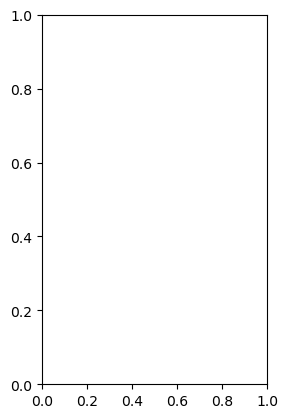

In [172]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(i):
    phi_list = np.arange(0, np.pi,.05)
    plt.subplot(121)
    plt.cla()

    plt.plot(q, I_list[i],c=cc[i],label=round(phi_list[i],3))
    plt.legend(loc=0)

    plt.subplot(122)
    plt.cla()

    plt.imshow(mask_list[i])
    
    plt.show()

plt.figure()
cc = make_colormap(len(I_list)+10,use_cmap='plasma')

interact(f, i=widgets.IntSlider(min=0, max=len(I_list)-1, step=1, value=10));

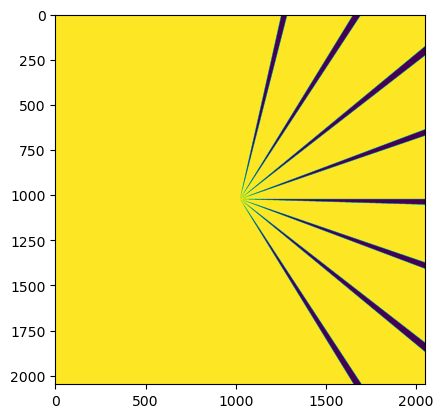

In [173]:
plt.imshow(mask_list[3])